# Numerical Project TFY4240 Sindre Lothe

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

newparams = {'figure.figsize': (12, 8), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}

plt.rcParams.update(newparams)

## Part 0: Theory

Using variables $\xi = x/L$, $\lambda = y/L$.

The equation we want to solve is 

$\nabla^2 V = 0$,

with boundary conditions 

$V(x=0, y)=0$,

$V(x=L, y)=0$,

$V(x, y=0)=0$,

$V(x, y=L)=V_0(x)$.

This results in solutions of the form 

$V(\xi, \lambda) = \sum_{n=1}^{\infty} A_n \sinh(n \pi \lambda) \sin(n \pi \xi)$,

where 

$A_n = \frac{2}{\sinh(n \pi)} \int_0^1 V_0(\xi/L) \sin(n \pi \xi) d\xi$.

## Part 1: Defining functions

The code below is a potential class, which takes in $N$, the number of terms in the Fourier series. It has a method called calculateCoefficients, which calculates the Fourier coefficients corresponding to $A_n$ above for a given potential $V_0(x)$ as a boundary condition. After that has been called we can use the functions V, Ex and Ey to find the potential and the electric field in x and y direction. 

The next block defines a function which uses the potential class to return the potential, the electric field and a coordinate system for a given number of Fourier coefficients and a given number of points in the coordinate system. 

In [17]:
class Potential:
    def __init__(self, N: int):
        self.coefficients_array: np.ndarray = np.zeros(N)
        self.N: int = N
        self.V: Callable[[float, float], float] = np.vectorize(self.scalar_V)
        self.Ex: Callable[[float, float], float] = np.vectorize(self.scalar_Ex)
        self.Ey: Callable[[float, float], float] = np.vectorize(self.scalar_Ey)


    def scalar_V(self, xi: float, lambd: float) -> float:
        return np.sum(self.coefficients_array * np.sinh([n*np.pi*lambd for n in range(1, self.N+1)]) * np.sin([n*np.pi*xi for n in range(1, self.N+1)]))

    def scalar_Ex(self, xi: float, lambd: float) -> float:
        return -np.sum(self.coefficients_array * np.sinh([n*np.pi*lambd for n in range(1, self.N+1)]) * np.cos([n*np.pi*xi for n in range(1, self.N+1)])*np.array([n for n in range(1, self.N+1)]))*np.pi

    def scalar_Ey(self, xi: float, lambd: float) -> float:
        return -np.sum(self.coefficients_array * np.cosh([n*np.pi*lambd for n in range(1, self.N+1)]) * np.sin([n*np.pi*xi for n in range(1, self.N+1)])*np.array([n for n in range(1, self.N+1)]))*np.pi
        
    def calculateCoefficients(self, V0: Callable[[float], float], M: int) -> None:
        xi_array: np.ndarray = np.linspace(0, 1, M)
        V0_array: np.ndarray = V0(xi_array)
        a_next: float = 0 
        for n in range(1, self.N+1):
            sin_array: np.ndarray = np.sin(n*np.pi*xi_array)
            a_next = np.sum(2/np.sinh(n*np.pi) * sin_array * V0_array/M)
            self.coefficients_array[n-1] = a_next


In [33]:
def calculatePotentialAndEField(numer_of_fourier: int, number_of_points: int, V0_func: Callable[[float], float]) -> List[np.ndarray]:
    
    xi_array: np.ndarray = np.linspace(0, 1, number_of_points)
    lambd_array: np.ndarray = np.linspace(0, 1, number_of_points)

    xx, yy = np.meshgrid(xi_array, lambd_array)

    Pot: Potential = Potential(numer_of_fourier)
    Pot.calculateCoefficients(V0_func, M)

    V_matrix: np.ndarray = Pot.V(xx, yy)
    Ex_matrix: np.ndarray = Pot.Ex(xx, yy)
    Ey_matrix: np.ndarray = Pot.Ey(xx, yy)

    return V_matrix, Ex_matrix, Ey_matrix, xx, yy
    

## Part 2: Different Potentials

### 2.1: First potential

The first potential to be examined is $V_0(x) = V_c (1-(x/L - 0.5)^4)$.

In [34]:
M: int = 500
N: int = 100

def V1(xi: float) -> float:
    return 1 - (xi - 0.5)**4

V_matrix, Ex_matrix, Ey_matrix, xx, yy = calculatePotentialAndEField(N, M, V1)

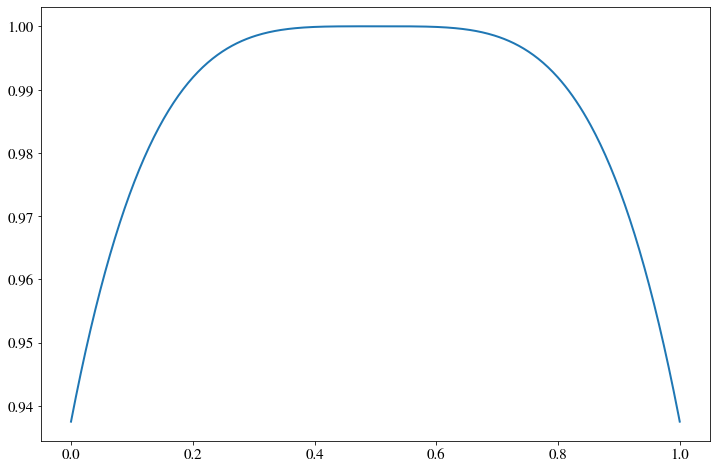

In [39]:
# plt.plot(xx[0], V_matrix[-1, :])
plt.plot(xx[0], V1(xx[0]))
plt.show()

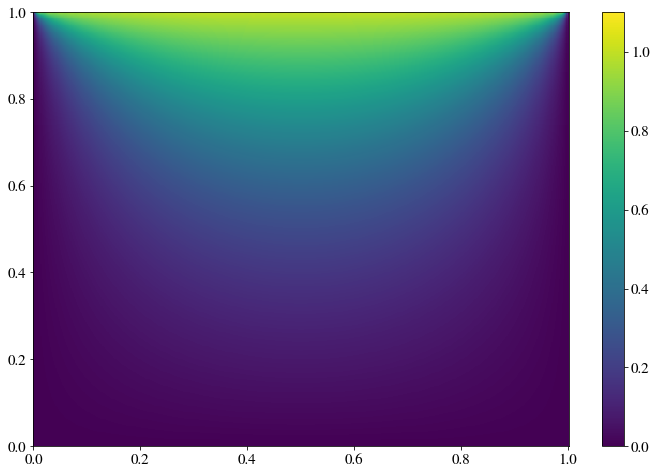

In [40]:
plt.pcolormesh(xx, yy, V_matrix)
plt.colorbar()
plt.show()

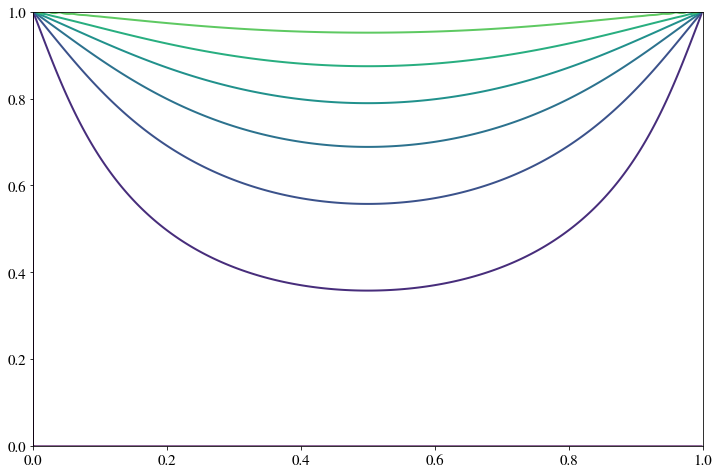

In [41]:
plt.contour(xx, yy, V_matrix)
plt.show()

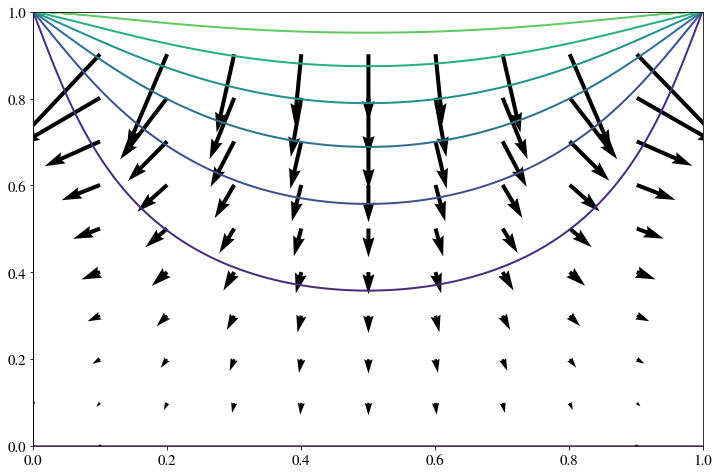

In [42]:
K = 10
slice = lambda arr : arr[::int(M/K), ::int(M/K)]
args = [xx, yy, Ex_matrix, Ey_matrix]

plt.quiver(*[slice(a) for a in args])
plt.contour(xx, yy, V_matrix)
plt.show()

In [29]:
def func(x, y, z):
    return x + y + z


func(*[1,2,3])

6

### 2.2: Second potential

The second potential to be examined is $V_0(x) = V_c \theta(x - L/2) \theta(3L/4 - x)$, where $\theta(x)$ is the Heaviside step function.

In [45]:
M: int = 500
N: int = 100

def V2(xi: float) -> float:
    return np.heaviside(xi - 0.5, 0.5)*np.heaviside(0.75 - xi, 0.5)

V_matrix, Ex_matrix, Ey_matrix, xx, yy = calculatePotentialAndEField(N, M, V2)

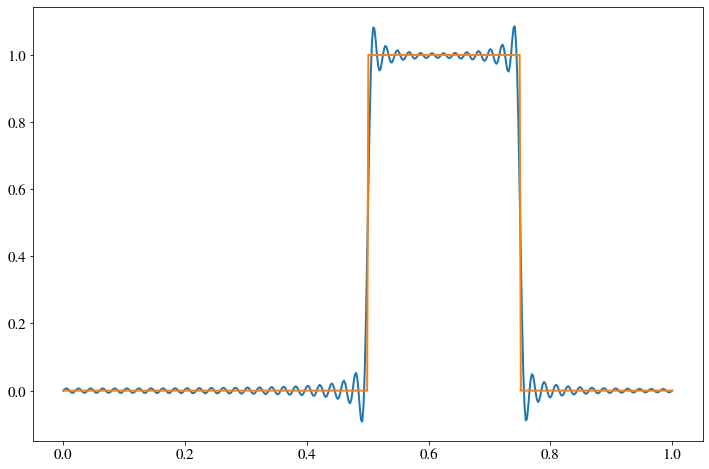

In [47]:
plt.plot(xx[0], V_matrix[-1, :])
plt.plot(xx[0], V2(xx[0]))
plt.show()

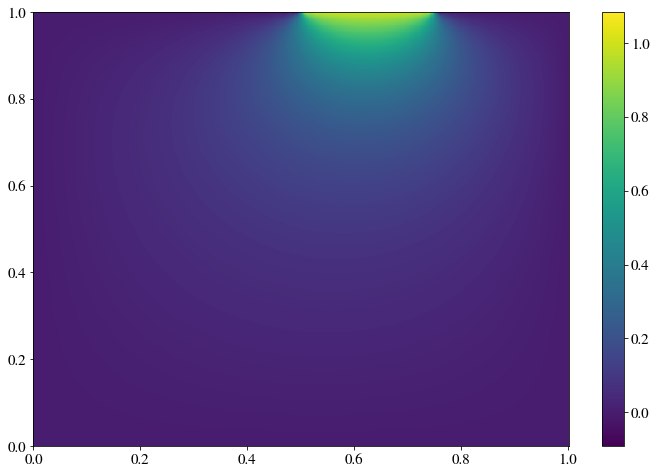

In [48]:
plt.pcolormesh(xx, yy, V_matrix)
plt.colorbar()
plt.show()

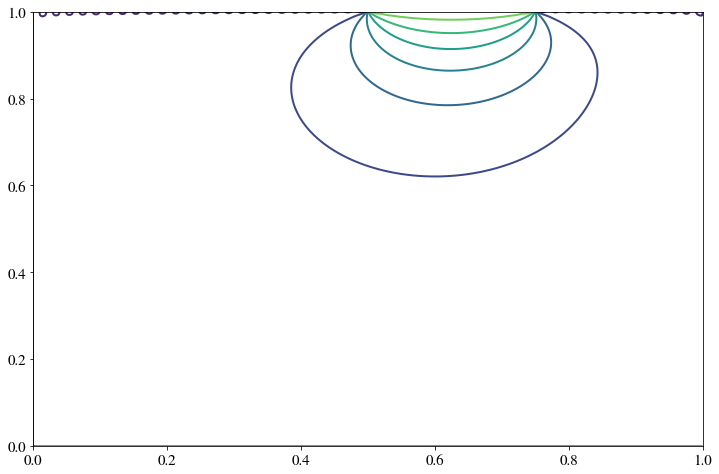

In [49]:
plt.contour(xx, yy, V_matrix)
plt.show()

/tmp/ipykernel_583/1948762819.py:4: RuntimeWarning: invalid value encountered in true_divide
  args = [xx, yy, Ex_matrix/E_matrix, Ey_matrix/E_matrix]


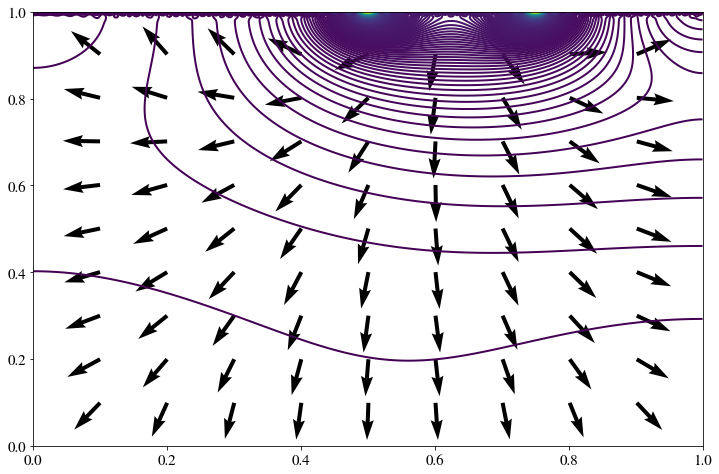

In [68]:
K = 10
slice = lambda arr : arr[::int(M/K), ::int(M/K)]
E_matrix = np.linalg.norm([Ex_matrix, Ey_matrix], axis=0)
args = [xx, yy, Ex_matrix/E_matrix, Ey_matrix/E_matrix]

plt.quiver(*[slice(a) for a in args])
# plt.contour(xx, yy, V_matrix)
plt.contour(xx, yy, E_matrix, levels=1000)
plt.show()

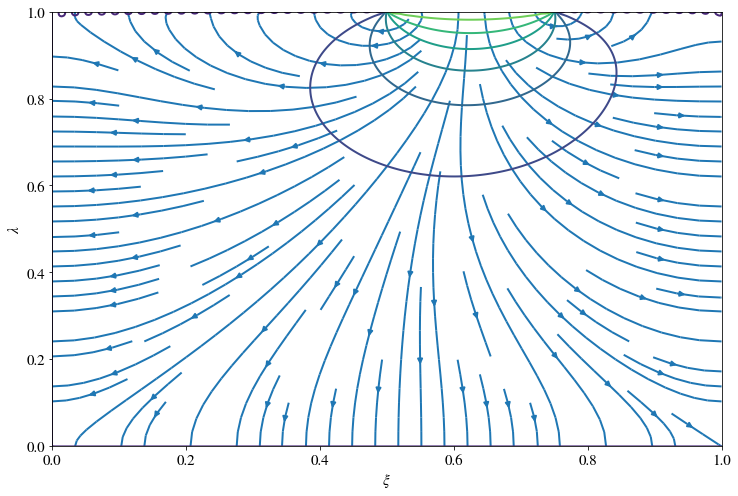

In [71]:
plt.streamplot(xx, yy, Ex_matrix, Ey_matrix)
plt.contour(xx, yy, V_matrix)
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\lambda$")
plt.show()